In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [5]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
362,15768072,Female,47,50000,1
275,15727467,Male,57,74000,1
103,15675949,Female,33,149000,1
128,15722758,Male,30,17000,0
63,15583681,Male,32,120000,1


In [7]:
df=df.iloc[:,1:]

In [8]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
df.sample(5)

,Age,EstimatedSalary,Purchased
58,22,18000,0
356,54,70000,1
72,20,23000,0
384,57,33000,1
297,43,112000,1


**train_test_split**
means you divide the datst into train,test set you give your 20% or 30% data to your test set
## from sklearn.model_selection import train_test_split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [17]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

standardscalar x=x-mean/s.d mean =0 and s.d=1

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# scaler fit train
scaler.fit(x_train)

# scaler trannsform test and train
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [19]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [20]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [21]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


<Axes: xlabel='Age', ylabel='Density'>

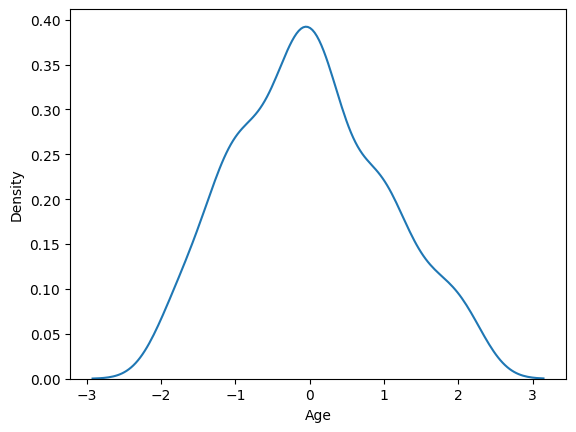

In [27]:
sns.kdeplot(x=x_train_scaled['Age'])

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

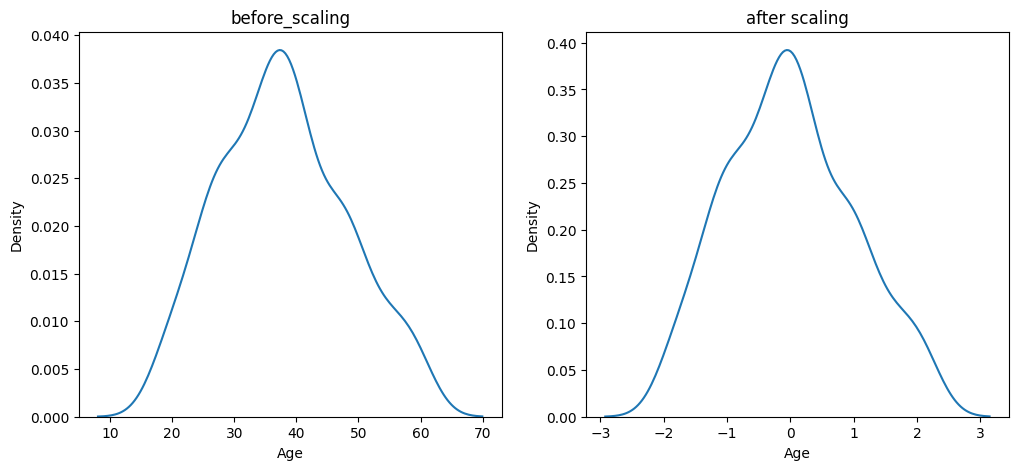

In [31]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# x_train
ax1.set_title("before_scaling")
sns.kdeplot(x=x_train['Age'],ax=ax1)
#x_train_scaled
ax2.set_title("after scaling")
sns.kdeplot(x=x_train_scaled['Age'],ax=ax2)


<Axes: title={'center': 'after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

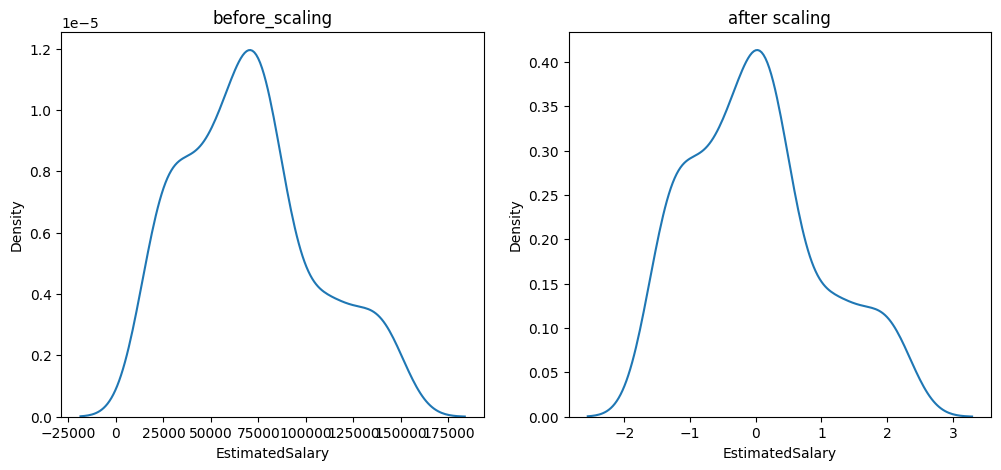

In [32]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# x_train
ax1.set_title("before_scaling")
sns.kdeplot(x=x_train['EstimatedSalary'],ax=ax1)
#x_train_scaled
ax2.set_title("after scaling")
sns.kdeplot(x=x_train_scaled['EstimatedSalary'],ax=ax2)

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

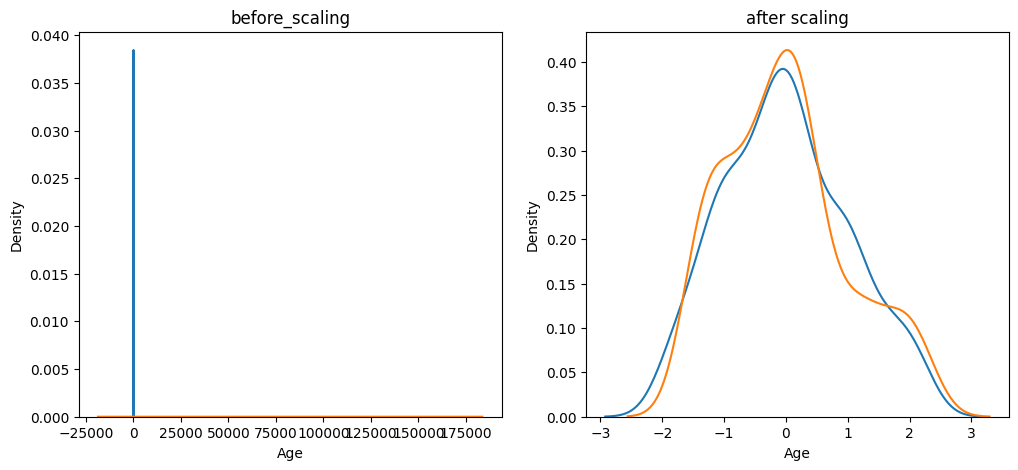

In [34]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# x_train
ax1.set_title("before_scaling")
sns.kdeplot(x=x_train['Age'],ax=ax1)
sns.kdeplot(x=x_train['EstimatedSalary'],ax=ax1)
#x_train_scaled
ax2.set_title("after scaling")
sns.kdeplot(x=x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x=x_train_scaled['EstimatedSalary'],ax=ax2)

# Effect of outlier
no change

In [36]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)

In [37]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


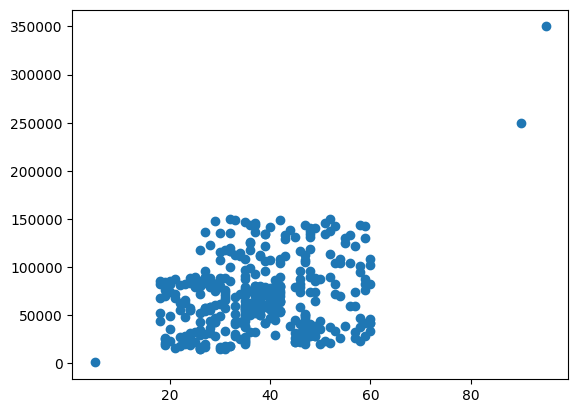

In [38]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

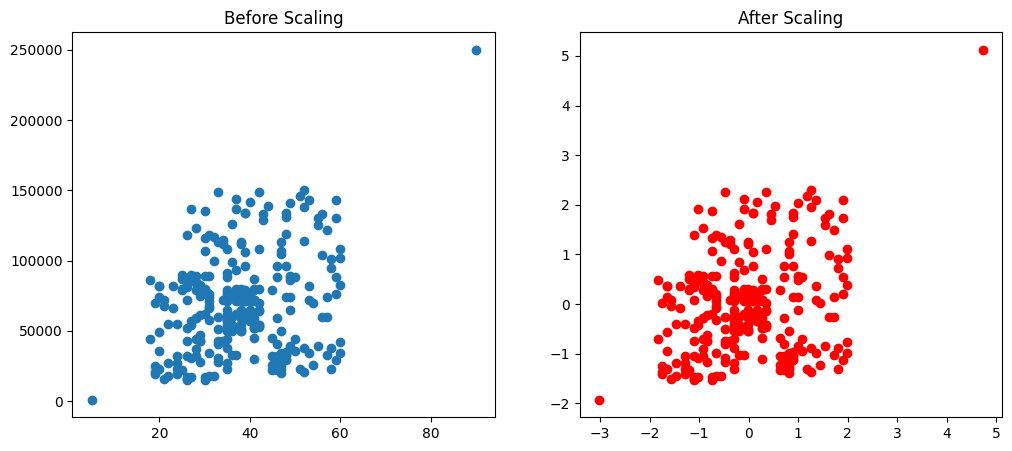

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# effect of scaling
no change in shape

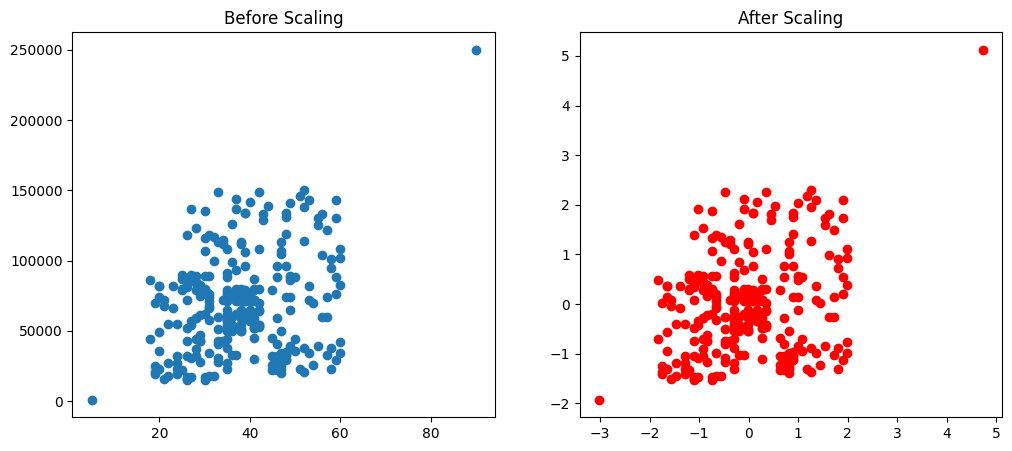

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()